# Case Study: Sentiment Analysis

### Data Prep

In [1]:
# This dataset also requires cleaning text and removing unwanted tokens using regular expressions,
# this part is not covered in this notebook to save time but strongly recommeded to perform.

In [2]:
import pandas as pd
import numpy as np

# Read in the data
df = pd.read_csv('datasets/Amazon_Unlocked_Mobile.csv')

# Sample the data to speed up computation
# Comment out this line to match with lecture
df = df.sample(frac=0.15, random_state=10)

df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
394349,Sony XPERIA Z2 D6503 FACTORY UNLOCKED Internat...,NaN,244.95,5,Very good one! Better than Samsung S and iphon...,0.0
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0


In [3]:
df.shape

(62076, 6)

In [4]:
# separating revivew and rating column
df = df[["Rating","Reviews"]]
# Drop missing values 
df.dropna(inplace=True)
print(df.shape)


# Remove any 'neutral' ratings equal to 3
df = df[df['Rating'] != 3]
# Encode 4s and 5s as 1 (rated positively)
# Encode 1s and 2s as 0 (rated poorly)
df['Positively Rated'] = np.where(df['Rating'] > 3, 1, 0)
df.head(10)

(62062, 2)


,Rating,Reviews,Positively Rated
394349,5,Very good one! Better than Samsung S and iphon...,1
34377,1,"The phone needed a SIM card, would have been n...",0
248521,5,I was 3 months away from my upgrade and my Str...,1
167661,1,an experience i want to forget,0
73287,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1
277158,5,I fell in love with this phone because it did ...,1
100311,5,I am pleased with this Blackberry phone! The p...,1
251669,5,"Great product, best value for money smartphone...",1
374058,4,except samsung pay everything is good,1
279878,5,I've bought 3 no problems. Fast delivery.,1


In [5]:
# Most ratings are positive
df['Positively Rated'].mean()

0.744958709429614

In [6]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], 
                                                    df['Positively Rated'],
                                                    test_size=0.2,
                                                    stratify = df['Positively Rated'],
                                                    random_state=0)
print(X_train.shape)
print(X_test.shape)

(45821,)
(11456,)


In [7]:
print('X_train first entry:\n\n', X_train.iloc[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry:

 pretty slow phone, snapchat was unusable and lagged. its a simple video app and if it cant handle it then that says a lot about the rest of the phone. returning it for a amazon giftcard


X_train shape:  (45821,)


# CountVectorizer

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer(lowercase=True,stop_words="english").fit(X_train)

In [9]:
vect.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [10]:
len(vect.get_feature_names())

26762

In [11]:
vect.get_feature_names()[::2000]

['00',
 'africa_en',
 'boggingly',
 'conned',
 'dogs',
 'fintie',
 'honesty',
 'legit',
 'nervious',
 'political',
 'resetearlo',
 'snob',
 'tlf',
 'whine']

In [12]:
len(vect.get_feature_names())

26762

In [13]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<45821x26762 sparse matrix of type '<class 'numpy.int64'>'
	with 713064 stored elements in Compressed Sparse Row format>

In [14]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

C:\Users\anshu\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))

In [16]:
model.score(vect.transform(X_test),y_test)

0.9285963687150838

In [17]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      2922
           1       0.94      0.97      0.95      8534

   micro avg       0.93      0.93      0.93     11456
   macro avg       0.92      0.89      0.90     11456
weighted avg       0.93      0.93      0.93     11456

[[2395  527]
 [ 291 8243]]


In [18]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print(model.coef_[0][sorted_coef_index[:10]])
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))
print(model.coef_[0][sorted_coef_index[:-11:-1]])

Smallest Coefs:
['worst' 'waste' 'terrible' 'junk' 'horrible' 'giving' 'sporadically'
 'disappointed' 'garbage' 'poor']

[-3.32554693 -3.22045649 -2.69516823 -2.62160901 -2.60042396 -2.44763633
 -2.43529051 -2.42623447 -2.38153229 -2.31428968]
Largest Coefs: 
['excelente' 'excelent' 'excellent' 'loves' 'perfectly' 'love' 'perfect'
 'exactly' 'exelente' 'awesome']
[4.11012515 3.8926866  3.8367847  3.46067662 3.21957061 3.15442984
 3.07320681 2.87318863 2.83225314 2.67304628]


# Tfidf

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df=5).fit(X_train)
len(vect.get_feature_names())

7752

In [20]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88      2922
           1       0.95      0.97      0.96      8534

   micro avg       0.94      0.94      0.94     11456
   macro avg       0.93      0.91      0.92     11456
weighted avg       0.94      0.94      0.94     11456

[[2484  438]
 [ 261 8273]]


In [21]:
feature_names = np.array(vect.get_feature_names())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['chemicals' 'kcal' 'vibratethe' 'verbatim' '320mah' 'corrosive' 'oblong'
 'disassembly' 'callsaccessories' 'benzene']

Largest tfidf: 
['sweet' 'stars' 'star' 'ideal' 'fraud' 'venta' 'excellente' 'excellent'
 'mm' 'excelentes']


In [22]:
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['not' 'disappointed' 'worst' 'slow' 'return' 'waste' 'terrible' 'doesn'
 'horrible' 'poor']

Largest Coefs: 
['great' 'love' 'excellent' 'perfect' 'best' 'good' 'perfectly' 'amazing'
 'awesome' 'easy']


In [23]:
# These reviews are treated the same by our current model
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[0 0]


# n-grams

In [24]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

51591

In [25]:
vect.get_feature_names()[::5000]

['00',
 'assigned',
 'commands',
 'features which',
 'hundred dollar',
 'looks very',
 'oh my',
 'questions',
 'staring at',
 'to life',
 'with expandable']

In [26]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      2922
           1       0.96      0.97      0.97      8534

   micro avg       0.95      0.95      0.95     11456
   macro avg       0.94      0.93      0.93     11456
weighted avg       0.95      0.95      0.95     11456

[[2595  327]
 [ 240 8294]]


In [27]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['no good' 'junk' 'not good' 'horrible' 'poor' 'worst' 'not very'
 'terrible' 'sucks' 'waste']

Largest Coefs: 
['excellent' 'excelente' 'excelent' 'perfect' 'not bad' 'great' 'awesome'
 'love' 'no problems' 'exelente']


In [28]:
# These reviews are now correctly identified
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[0 0]


# LSTM

In [29]:
from keras import models,layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [30]:
x= df['Reviews']
y = df['Positively Rated']
print(x.shape)
print(y.shape)

(57277,)
(57277,)


In [31]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 120

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', 
                      lower=True)

tokenizer.fit_on_texts(x.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 31508 unique tokens.


In [32]:
# replace the words in the document by their index to give an array 
# of numbers 
x = tokenizer.texts_to_sequences(x.values)
# truncating the documents/sequences with a fixed length of 250
x = pad_sequences(x, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x.shape)

Shape of data tensor: (57277, 250)


In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(51549, 250) (51549,)
(5728, 250) (5728,)


In [34]:
model = models.Sequential()
model.add(layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=x.shape[1]))
model.add(layers.SpatialDropout1D(0.2))
model.add(layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=10, batch_size=1000,validation_data=(X_test,Y_test),
                    verbose=True)

Train on 51549 samples, validate on 5728 samples
Epoch 1/10
51549/51549 [==============================] - 116s 2ms/step - loss: 0.4877 - acc: 0.7694 - val_loss: 0.3337 - val_acc: 0.8561
Epoch 2/10
51549/51549 [==============================] - 116s 2ms/step - loss: 0.2339 - acc: 0.9070 - val_loss: 0.1809 - val_acc: 0.9344
Epoch 3/10
51549/51549 [==============================] - 121s 2ms/step - loss: 0.1634 - acc: 0.9417 - val_loss: 0.1674 - val_acc: 0.9410
Epoch 4/10
51549/51549 [==============================] - 108s 2ms/step - loss: 0.1345 - acc: 0.9531 - val_loss: 0.1601 - val_acc: 0.9422
Epoch 5/10
51549/51549 [==============================] - 110s 2ms/step - loss: 0.1178 - acc: 0.9590 - val_loss: 0.1601 - val_acc: 0.9476
Epoch 6/10
51549/51549 [==============================] - 109s 2ms/step - loss: 0.1057 - acc: 0.9643 - val_loss: 0.1661 - val_acc: 0.9447
Epoch 7/10
51549/51549 [==============================] - 126s 2ms/step - loss: 0.1008 - acc: 0.9660 - val_loss: 0.1566 - v

In [35]:
loss,accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(loss,accr))

5728/5728 [==============================] - 63s 11ms/step
Test set
  Loss: 0.171
  Accuracy: 0.945


In [36]:
predictions = model.predict_classes(X_test)
print(classification_report(Y_test,predictions))
print(confusion_matrix(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1511
           1       0.96      0.96      0.96      4217

   micro avg       0.95      0.95      0.95      5728
   macro avg       0.93      0.93      0.93      5728
weighted avg       0.94      0.95      0.94      5728

[[1348  163]
 [ 152 4065]]


In [37]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

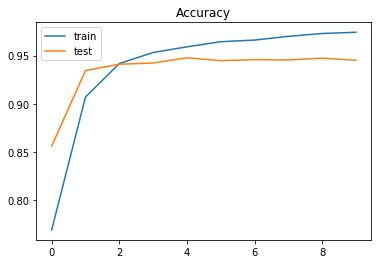

In [38]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

In [39]:
ip = [['not an issue, phone is working'],['an issue, phone is not working']]
ip = tokenizer.texts_to_sequences(ip)

In [40]:
ip = pad_sequences(ip,maxlen=250)
ip.shape

(2, 250)

In [41]:
model.predict_classes(ip)

array([[1],
       [1]])